In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lecture des données

In [2]:
don = pd.read_csv('iris.csv')
don.head()

,X1,X2,X3,X4,Y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
Y = np.zeros(don.values[:,4].shape)
Y = Y + (don.values[:,4]=='Iris-versicolor')
Y = Y + 2*(don.values[:,4]=='Iris-virginica')
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [4]:
data = don.values[:,:-1].astype('float32')
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]], dtype=float32)

## Normalisation

In [5]:
data = (data - data.mean(axis=0))/data.std(axis=0)
data[:5]

array([[-0.9006812 ,  1.0320569 , -1.3412726 , -1.3129768 ],
       [-1.1430167 , -0.12495793, -1.3412726 , -1.3129768 ],
       [-1.3853527 ,  0.33784813, -1.3981384 , -1.3129768 ],
       [-1.5065205 ,  0.10644482, -1.284407  , -1.3129768 ],
       [-1.0218489 ,  1.2634597 , -1.3412726 , -1.3129768 ]],
      dtype=float32)

## Implémentation de Kmeans

In [6]:
def kmeans(X, k):
    diff = True
    cluster = np.zeros(X.shape[0])
    centroids = data[:k]
    while diff:
        for i, row in enumerate(X):
            mn_dist = float('inf')
            for idx, centroid in enumerate(centroids):
                d = np.sqrt(np.power(centroid-row,2).sum())
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X,dtype=float).groupby(by=cluster).mean().values
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = False
        else:
            centroids = new_centroids
    return centroids, cluster

## Résultats pour K=3

In [7]:
cent,clus = kmeans(data,3)

In [8]:
cent

array([[ 1.16743417,  0.15377744,  1.00314535,  1.02963254],
       [-0.01139546, -0.87288534,  0.37688405,  0.3116535 ],
       [-1.01457886,  0.84230649, -1.30487863, -1.25512869]])

In [9]:
clus

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

## Mesures de performance du clustering

In [10]:
def dstMoyCentres(cent): #distance moyenne interclasse, difference entre centroides
    DSTs = []
    for i in range(cent.shape[0]):
        for j in range(i+1,cent.shape[0]):
            DSTs = DSTs + [(cent[i]-cent[j]).sum()**2]
    return (np.mean(DSTs))
def dstMoyIntra(data,cent,clus,k): #difference moyenne intraclasse, difference entre chaque valeur et son centroid
    DSTs = []
    for c in range(k):
        DSTs = DSTs + [abs((data[clus==c]-cent[c]).sum())]
    return (np.mean(DSTs))
def inertie(data,cent,clus):
    dist = 0
    for i in range(data.shape[0]):
        dist = dist + (np.power(data[i]-cent[int(clus[i])],2).sum())
    return (dist)

## Kmeans appliqué pour differentes valeurs de K

In [11]:
maxClusN = 8
minClusN = 2
Ks = range(minClusN,maxClusN+1)
dst = []
dst2 = []
ine = []
for k in Ks:
    cent,clus = kmeans(data,k)
    dst = dst + [dstMoyCentres(cent)]
    dst2 = dst2 + [dstMoyIntra(data,cent,clus,k)]
    ine = ine + [inertie(data,cent,clus)]
print("Les distances interclasse trouvées sont : ",np.round(dst,4))
print("Les distances intraclasse trouvées sont : ",np.round(np.array(dst2)*1000000000000000,4),"/10^15")
print("Les inerties trouvées sont : ",np.round(ine,4))

Les distances interclasse trouvées sont :  [16.797  18.6924 18.4652 16.0115 16.0264 15.4542 13.3526]
Les distances intraclasse trouvées sont :  [5.7732 6.2172 4.0662 2.1871 1.6283 1.3481 1.249 ] /10^15
Les inerties trouvées sont :  [223.732  141.1542 114.6155 105.3245 103.7241 102.0623 101.8744]


Il suffit donc de prendre le nombre de clusters qui donne le maximum de distance interclasse!
On choisi donc  3
Les distance intraclasse par contre sont trop petites


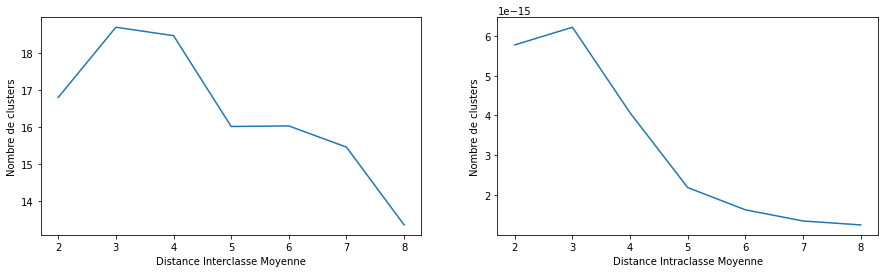

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
ax1.plot(Ks,dst)
ax1.set(xlabel="Distance Interclasse Moyenne",ylabel="Nombre de clusters")
ax2.plot(Ks,dst2)
ax2.set(xlabel="Distance Intraclasse Moyenne",ylabel="Nombre de clusters")
print("Il suffit donc de prendre le nombre de clusters qui donne le maximum de distance interclasse!")
print("On choisi donc ",Ks[np.argmax(dst)])
print("Les distance intraclasse par contre sont trop petites")

## La méthode du coude

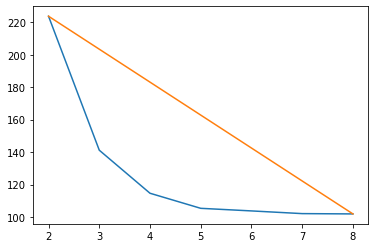

In [13]:
plt.plot(Ks,ine)
plt.plot([min(Ks),max(Ks)],[ine[min(Ks)-minClusN],ine[max(Ks)-minClusN]])

Les distances trouvées sont :  [0.     3.0622 3.3686 2.8267 1.9066 0.9896 0.    ]
Donc avec la méthode du coude on choisi  4  clusters.


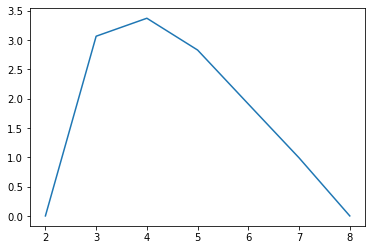

In [14]:
def calcDst(x,y,a,b,c):
    return (abs(a*x+b*y+c)/np.sqrt(a*a+b*b))
a = ine[max(Ks)-minClusN] - ine[min(Ks)-minClusN]
b = -(max(Ks)-min(Ks))
c = -min(Ks)*ine[max(Ks)-minClusN]+max(Ks)*ine[min(Ks)-minClusN]
DSTS = []
for k in range(maxClusN-minClusN+1):
    DSTS = DSTS + [calcDst(Ks[k],ine[k],a,b,c)]
plt.plot(Ks,DSTS)
print("Les distances trouvées sont : ",np.round(DSTS,4))
print("Donc avec la méthode du coude on choisi ",Ks[np.argmax(DSTS)]," clusters.")

## En faisant appel a l'algorithme MeanShift

In [15]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.26, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=False, n_jobs=-1, max_iter=500)
ms.fit(data)

print(f"Number of estimated clusters : {len(np.unique(ms.labels_))}")

Number of estimated clusters : 3
